In [73]:
import numpy as np

In [74]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [75]:
X_train= X_train / 255.0
X_test = X_test / 255.0

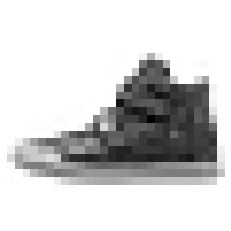

In [76]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[142], cmap="binary") 
plt.axis('off')
plt.show()

In [77]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [78]:
import os
root_logdir = os.path.join(os.curdir, "image_logs") 
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [79]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])




In [80]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_split=0.1, callbacks=[tensorboard_cb])

Epoch 1/20
  24/1688 [..............................] - ETA: 7s - loss: 2.1591 - accuracy: 0.2461

2022-05-26 12:12:50.478140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1682/1688 [============================>.] - ETA: 0s - loss: 0.7394 - accuracy: 0.7554

2022-05-26 12:12:57.583943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 8s 4ms/step - loss: 0.7391 - accuracy: 0.7555 - val_loss: 0.5433 - val_accuracy: 0.8045
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4927 - accuracy: 0.8286 - val_loss: 0.4659 - val_accuracy: 0.8380
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4460 - accuracy: 0.8440 - val_loss: 0.5842 - val_accuracy: 0.7898
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.8537 - val_loss: 0.4334 - val_accuracy: 0.8508
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3994 - accuracy: 0.8619 - val_loss: 0.4202 - val_accuracy: 0.8510
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3831 - accuracy: 0.8670 - val_loss: 0.4268 - val_accuracy: 0.8533
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3694 - accuracy: 0.8697 - val_loss: 0.3760 - val_accuracy: 0.8653
Epo

Prediction: kurtka
Confidence: 0.9783286
Truth: kurtka


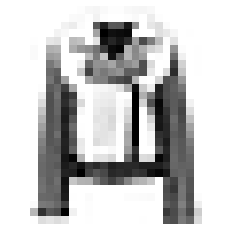

In [89]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
#regression

In [90]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [92]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [94]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[8]))
model.add(keras.layers.Dense(30))


model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer="sgd",
              metrics=["accuracy"])

In [95]:
 es = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,verbose=1)

In [96]:
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [100]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_split=0.1, callbacks=[tensorboard_cb, es])

Epoch 1/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5936 - accuracy: 0.0000e+00 - val_loss: 0.6607 - val_accuracy: 0.0000e+00
Epoch 2/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5910 - accuracy: 0.0000e+00 - val_loss: 0.6582 - val_accuracy: 0.0000e+00
Epoch 3/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5887 - accuracy: 0.0000e+00 - val_loss: 0.6557 - val_accuracy: 0.0000e+00
Epoch 4/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5863 - accuracy: 0.0000e+00 - val_loss: 0.6532 - val_accuracy: 0.0000e+00
Epoch 5/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5843 - accuracy: 0.0000e+00 - val_loss: 0.6510 - val_accuracy: 0.0000e+00
Epoch 6/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5822 - accuracy: 0.0000e+00 - val_loss: 0.6489 - val_accuracy: 0.0000e+00
Epoch 7/100
327/327 [==============================] - 1s 4ms/step - loss: 0.5800 - accuracy: 